# **Laboratorio di introduzione all'apprendimento automatico - Lezione 2**


**Lezione 2**

Argomenti della lezione odierna:

1.  Skitlearn.
2.  Apprendimento supervisionato.
3.  Caso di studio, il tasks di classificazione.


# Tipi di Apprendimento

**Supervised Learning:**

I dati in training e test hanno entrambi dati etichettati.

$$
\text{Training:}
$$

$$
[(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)] \text{ dove } (x_i \in X, y_i \in Y)
$$

$$
\text{Testing:}
$$

$$
[(x'_1, y'_1), (x'_2, y'_2), \ldots, (x'_m, y'_m)] \text{ dove } (x'_j \in X, y'_j \in Y)
$$


**Unsupervised Learning:**

I dati in training e test non hanno dati etichettati.

$$
\text{Training:}
$$

$$
[ (x_1),( x_2), \ldots, (x_n)] \text{ dove } (x_i \in X)
$$

$$
\text{Testing: }
$$

$$
[(x'_1), (x'_2), \ldots, (x'_m)] \text{ dove } (x'_j \in X)
$$


**Semi-Supervised Learning:**

I dati in training possono avere degli esempi etichettati, in test no.

$$
\text{Training: }
$$

$$
[(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)] \text{ dove } (x_i \in X, y_i \in Y)
$$


$$
\text{Testing: }
$$

$$
[(x'_1), (x'_2), \ldots, (x'_m)] \text{ dove } (x'_j \in X)
$$



















Supervised Learning Tasks:

*   Classificazione

*   Regressione


Unsupervised Learning Tasks:

*  Clustering

*  Riduzione della dimensionalità

*  Outlier Detection

*  Estrapolazione di features nascoste



# Pandas e Skitlearn

## Pandas

Pandas fornisce strutture dati di alto livello come DataFrame e Series, che sono più flessibili e facili da usare rispetto agli array NumPy. Queste strutture rendono più semplice organizzare e analizzare dati tabellari.

In [102]:
import pandas as pd
import numpy as np

mydataset = {
  'names': np.array(['Alice', 'Bob', 'Charlie', 'David', 'Eve']),
  'ages':  np.array([20, 22, 21, 23, 20]),
  'scores':np.array([85, 92, 78, 95, 88])
}

df = pd.DataFrame(mydataset)
df

,names,ages,scores
0,Alice,20,85
1,Bob,22,92
2,Charlie,21,78
3,David,23,95
4,Eve,20,88


Dataframes pandas sono strutture bidimensionali che contengono una o piu colonne.
Le colonne a loro volta sono Series, ovvero oggetti unidimensionali.

In [103]:
print( f"DataFrame:\t\t{type(df)}")
print( f"DataFrame[ages]:\t{type(df['ages']) }")

DataFrame:		<class 'pandas.core.frame.DataFrame'>
DataFrame[ages]:	<class 'pandas.core.series.Series'>


In [108]:
df["ages"] + 3


0    23
1    25
2    24
3    26
4    23
Name: ages, dtype: int64

In [114]:
res = df["ages"] + df["scores"]
res

0    105
1    114
2     99
3    118
4    108
dtype: int64

In [115]:
res = df[ df["names"] == "David"]
res

,names,ages,scores
3,David,23,95


In [116]:
res = df[ df["scores"] > 90 ]
res

,names,ages,scores
1,Bob,22,92
3,David,23,95


In [117]:
res = df[(df["scores"] > 80) & (df["scores"] < 90)]
res

,names,ages,scores
0,Alice,20,85
4,Eve,20,88


In [118]:
#nuova colonna
np.random.seed(42)
df["nuova"] = np.random.randint(0,10, df.shape[0])
df

,names,ages,scores,nuova
0,Alice,20,85,6
1,Bob,22,92,3
2,Charlie,21,78,7
3,David,23,95,4
4,Eve,20,88,6


Panda fornisce metodi utili per l'acquisizione dei dati

In [ ]:
#come file path potete mettere direttamente quello del vostro file in locale.
file_path_csv="path/to/your/file.csv"
file_path_xls="path/to/your/file.xlsx"
df = pd.read_csv(file_path_file_csv)
df = pd.read_excel(file_path_file_xls)


##i comandi di seguito creano e sovrascrivono i file se già esistono.
output_file_path_csv="path/to/your/file.csv"
output_file_path_xls="path/to/your/file.xlsx"
#index uguale a false indica che non viene stampato l'indice di riga.

df.to_csv(output_file_path_csv, index=False)
df.to_excel(output_file_path_xls, index=False)

Inoltre mette a disposizioni una serie di utiliti per preprocessare i dati. Faremo vedere alcuni esempi di seguito


In [91]:
# Creazione di un DataFrame fittizio con errori
data = {
    'Nome': ['Alice', 'Bob', 'Charlie', 'David', np.nan, 'Eve'],
    'Età': [25, 30, 22, np.nan, 35, 28],
    'Punteggio': [85, 92, 78, 64, 99, 88],
    'Sesso': ['F', 'M', 'M', 'M', 'M', 'F'],
    'Indirizzo': ['123 Main St', '456 Elm St', np.nan, '789 Oak St', '555 Pine St', '999 Maple St'],
    'Nazionalità': ['USA', 'Canada', 'UK', 'USA', 'Germany', 'France']
}

df = pd.DataFrame(data)

# Visualizzazione del DataFrame con errori
print("DataFrame con errori:")
print(df)

# Pulizia dei dati
# 1. Rimozione delle righe con valori mancanti
df = df.dropna()

# 2. Rimozione dei duplicati
df = df.drop_duplicates()

# 3. Trasformazione dei valori in modo coerente (ad esempio, età in interi)
df['Età'] = df['Età'].astype(int)

# 4. Validazione dei dati (ad esempio, verificare che l'età sia compresa tra 18 e 99)
df = df[(df['Età'] >= 18) & (df['Età'] <= 99)]

# 5. Correzione di errori specifici (ad esempio, correggere un valore errato nell'indirizzo)
df.loc[df['Nome'] == 'David', 'Indirizzo'] = '567 Cedar St'

# 6. Trasformare M ed F in booleani True o false
df['Donna'] = df['Sesso'] == 'F'  # True se 'M', False se 'F'

# 7. Categorizzare automaticamente le nazionalità
df['Nazionalità'] = df['Nazionalità'].astype('category').cat.codes

# Visualizzazione del DataFrame pulito
print("\nDataFrame pulito:")
print(df)

DataFrame con errori:
      Nome   Età  Punteggio Sesso     Indirizzo Nazionalità
0    Alice  25.0         85     F   123 Main St         USA
1      Bob  30.0         92     M    456 Elm St      Canada
2  Charlie  22.0         78     M           NaN          UK
3    David   NaN         64     M    789 Oak St         USA
4      NaN  35.0         99     M   555 Pine St     Germany
5      Eve  28.0         88     F  999 Maple St      France

DataFrame pulito:
    Nome  Età  Punteggio Sesso     Indirizzo  Nazionalità  Donna
0  Alice   25         85     F   123 Main St            2   True
1    Bob   30         92     M    456 Elm St            0  False
5    Eve   28         88     F  999 Maple St            1   True


## SkitLearn

E' una libreria pyton che contiene un insieme di tools per fare Mashine Learning in python.

Skitlean fornisce i metodi per implementare le fasi di sviluppo di un modello di apprendimento automatico

*   Built-in datasets.
*   Data preprocessing.
*   Training dei modelli predittivi.
*   Valutazione dei modelli

In [ ]:
import sklearn

### Dataset Acquisitions
I dataset di sklearn si dividono in 3 interfacce:

*   **Dataset loaders**: per caricare piccoli dataset standard.

*   **Dataset generation functions**: permettono di generare dei dataset sintetici.

*   **Dataset fetchers**: permettono di scaricare grossi dataset open-source.


#### Dataset Loaders interface

A scopo di esempio faremo vedere come è possibile importare il dataset IRIS.
[doc link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

'Iris dataset è un dataset di esempio che contiene misurazioni di quattro caratteristiche di tre diverse specie di fiori Iris: Setosa, Versicolor e Virginica. Le quattro caratteristiche sono la lunghezza e la larghezza del sepalo e del petalo, misurate in centimetri.

Questo dataset è ampiamente utilizzato per scopi educativi e dimostrativi poiché rappresenta un problema di classificazione multi-classe. L'obiettivo è di addestrare un modello di machine learning per prevedere la specie di un fiore Iris in base alle sue caratteristiche.

![image](https://drive.google.com/uc?id=1LWoWWLUxUvzbW2CPX916SsXnlNYn-zOU )

In [6]:
from sklearn.datasets import load_iris
iris_dataset_np = load_iris() #ritorna un oggetto che contiene due numpy
x_np = iris_dataset_np.data #x è di tipo numpy
y_np = iris_dataset_np.target# y è di tipo numpy

iris_dataset_pd = load_iris(as_frame=True) #as_frame torna un oggetto che contiene
x_pd = iris_dataset_pd.data #è un DataFrame pandas
y_pd = iris_dataset_pd.target #è un Series pandas

x_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Iris Exploratory Data Analysis

In [7]:
df = x_pd.copy()
df["Targets"]= y_pd
df.head(10)#stampa le prime 5 righe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Targets
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


Vogliamo raggruppare i dati per avere delle statistiche descrittive

In [8]:
df.describe() #computa le statistiche sui dati

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Targets
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Proviamo a mostrare le distribuzioni dei dati sul grafo.

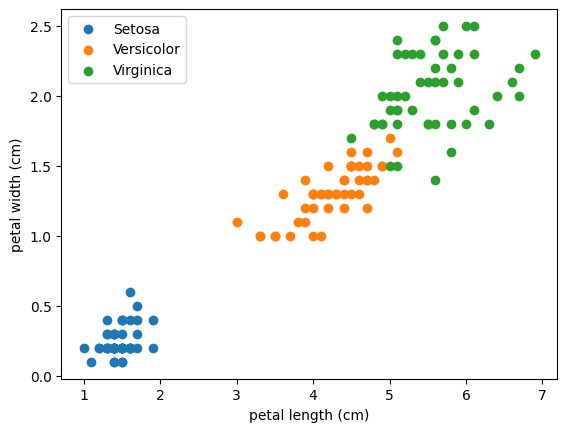

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

map_dict = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df['Species'] = df['Targets'].map(map_dict)

def scatter_plot(df, x_name, y_name ):
    for species, gruppo in df.groupby("Species"):
      plt.scatter(gruppo[x_name], gruppo[y_name], label=species )

    # Mostra il grafico
    plt.legend()
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

scatter_plot( df, x_name="petal length (cm)", y_name="petal width (cm)")

Vediamo la distribuzione dei dati rispetto alla lunghezza del sepalo

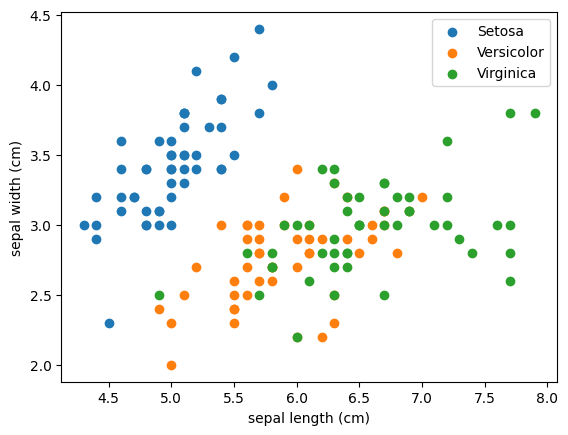

In [10]:
scatter_plot( df, x_name="sepal length (cm)", y_name="sepal width (cm)")

Qua usiamo "seaborn" per mostrare questi grafici, simile a matplotlib ma con alcune funzionalità in più.

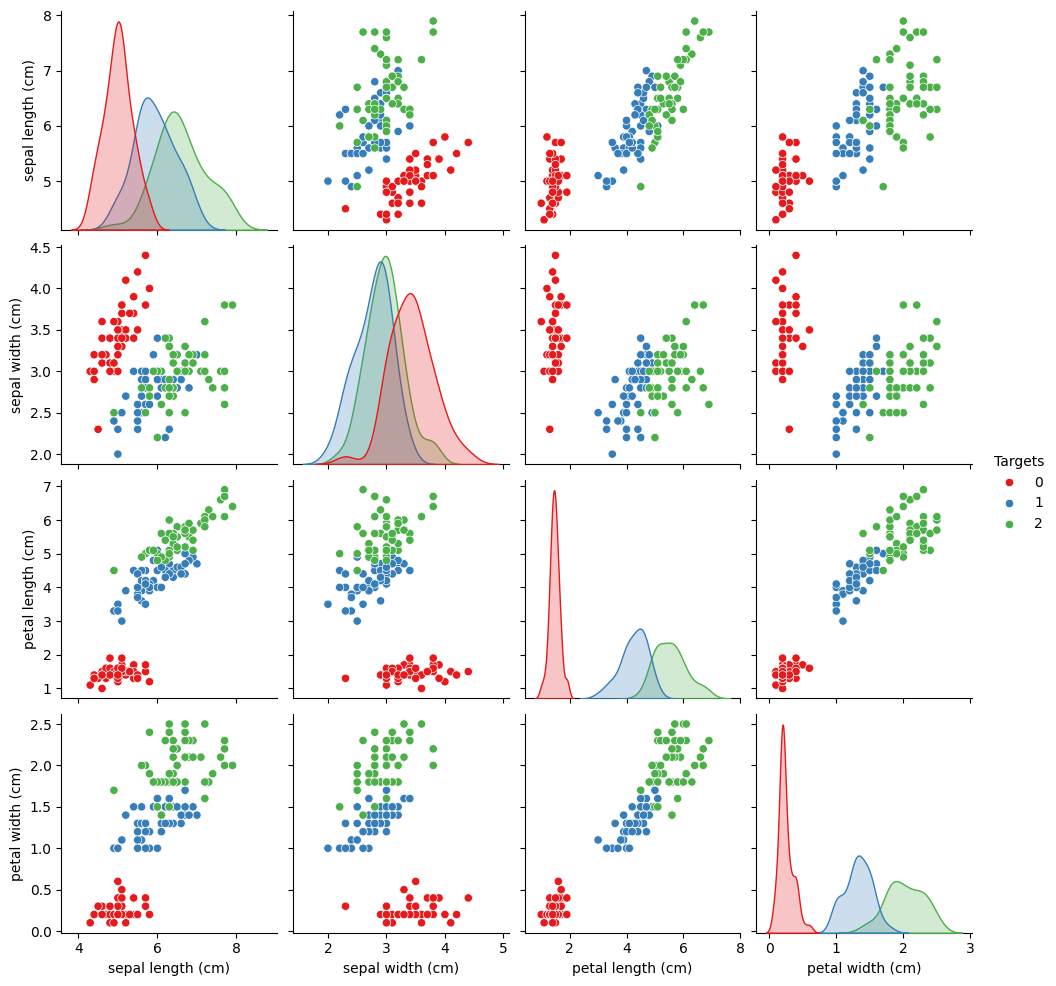

In [11]:
sns.pairplot(df, hue="Targets", palette="Set1")

Andiamo a calcolare il coefficiente di Pearson, che non ci viene detto come viene fatto in quanto non è un interesse principale ora come ora.

Il coefficiente di Pearson assume valori in [-1,1] e più un valore è alto è più è correlato, mentre meno è alto meno è correlato.
Ovvero: quando il coefficiente vale:
- r > 0
  - Indica una correlazione positiva
  - Quando il valore è 1, vuol dire che è una correlazione lineare perfetta, ovvero i dati sono allineati su una retta crescente
- r = 0
  - Suggerisce che non ci sia relazione tra le variabili
  - Non vuol dire che non ne esistono per niente, ma che non sono lineari, ve ne potrebbero essere altre (quadrate, esponenziali, etc.) che non sono considerate dal coefficiente di Pearson
- r < 0
  - L'inverso del positivo, ovvero quando una aumenta, l'altra diminuisce

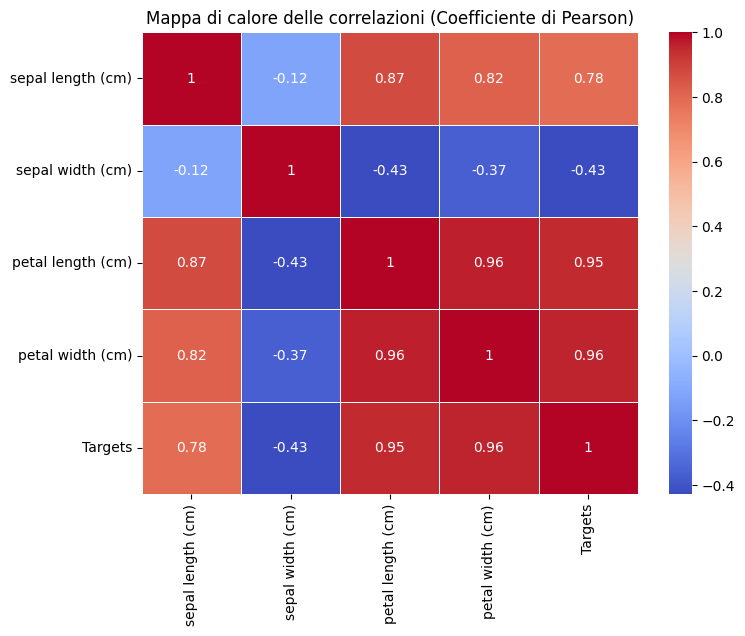

In [13]:
#correlazioni lineari con il coefficiente di pearson
# Calcolo della correlazione con il coefficiente di Pearson
correlation_matrix = df.corr(method='pearson', numeric_only="true")

# Creazione di una mappa di calore
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mappa di calore delle correlazioni (Coefficiente di Pearson)')
plt.show()


#### Dataset Generation Functions interface

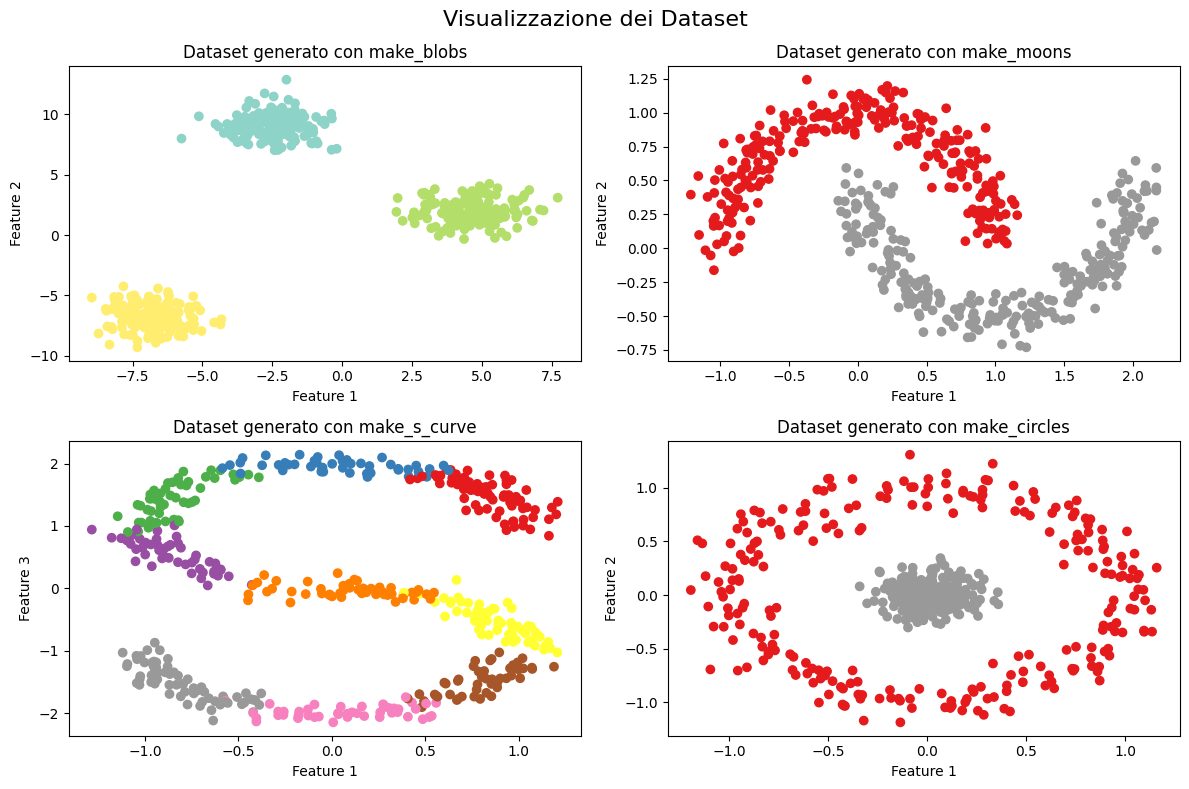

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_s_curve, make_circles

n_samples = 500
n_features = 2
random_seed = 42
noise_factor = 0.1

# Genera il dataset con make_blobs
X_blobs, y_blobs = make_blobs(n_samples=n_samples, n_features=n_features, centers=3, random_state=random_seed )

# Genera il dataset con make_moons
X_moons, y_moons = make_moons(n_samples=n_samples, noise=noise_factor, random_state=random_seed)

# Genera il dataset con make_s_curve
X_s_curve, y_s_curve = make_s_curve(n_samples=n_samples, noise=noise_factor, random_state=random_seed)

# Genera il dataset con make_circles
X_circles, y_circles = make_circles(n_samples=n_samples, noise=noise_factor, factor=0.1, random_state=random_seed)

# Creazione del grafico
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Visualizzazione dei Dataset', fontsize=16)

# Plot per make_blobs
axes[0, 0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='Set3')
axes[0, 0].set_xlabel("Feature 1")
axes[0, 0].set_ylabel("Feature 2")
axes[0, 0].set_title("Dataset generato con make_blobs")

# Plot per make_moons
axes[0, 1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='Set1')
axes[0, 1].set_xlabel("Feature 1")
axes[0, 1].set_ylabel("Feature 2")
axes[0, 1].set_title("Dataset generato con make_moons")

# Plot per make_s_curve
axes[1, 0].scatter(X_s_curve[:, 0], X_s_curve[:, 2], c=y_s_curve, cmap='Set1')
axes[1, 0].set_xlabel("Feature 1")
axes[1, 0].set_ylabel("Feature 3")
axes[1, 0].set_title("Dataset generato con make_s_curve")

# Plot per make_circles
axes[1, 1].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='Set1')
axes[1, 1].set_xlabel("Feature 1")
axes[1, 1].set_ylabel("Feature 2")
axes[1, 1].set_title("Dataset generato con make_circles")

plt.tight_layout()
plt.show()



#### Dataset Fetchers

 The Labeled Faces in the Wild face recognition dataset
[vai a vedere tutti i dataset](https://scikit-learn.org/stable/datasets/real_world.html)

In [18]:
from sklearn.datasets import fetch_lfw_people, fetch_covtype
import numpy as np
data2 = fetch_lfw_people(color=True) #false ritorna in scala di grigi
# Estrai le immagini e le etichette
X = data2.images
y = data2.target

# Stampare le dimensioni dei dati
print(f'Dimensioni dei dati: {X.shape}')
print(f'Dimensioni delle etichette: {y.shape}')


Dimensioni dei dati: (13233, 62, 47, 3)
Dimensioni delle etichette: (13233,)


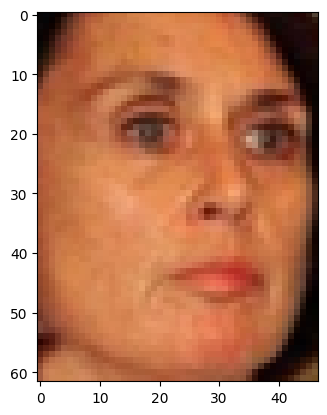

In [16]:
plt.imshow(X[5])
plt.show()

In [19]:
print(f"Img shape{X[0].shape}")
print(f"Min: {np.min(X)}")
print(f"Max: {np.max(X)}")
print(f"Dtype: {X.dtype}")
#come si fa a trasformarli in scala di grigi ?

Img shape(62, 47, 3)
Min: 0.0
Max: 1.0
Dtype: float32


Img shape(62, 47)
Min: 0.0
Max: 1.0
Dtype: float32


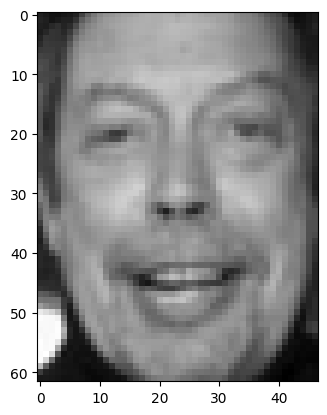

In [20]:
x_gray = np.mean( X, axis=-1)
print(f"Img shape{x_gray[0].shape}")
print(f"Min: {np.min(x_gray)}")
print(f"Max: {np.max(x_gray)}")
print(f"Dtype: {x_gray.dtype}")
plt.imshow(x_gray[0], cmap="gray")
plt.show()

### Data preprocessing


1.   Normalizzazione
2.   Sbilanciamento delle classi
3.   Train Test split stratificato

**Datasets Normalization**

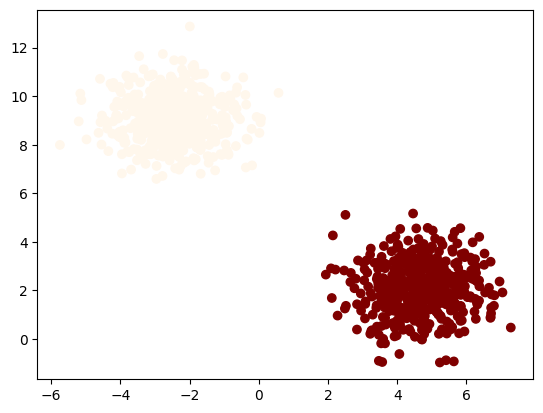

In [191]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 1000
n_features = 2
n_classes = 2
random_seed = 42
noise_factor = 0.1

# Genera il dataset con make_blobs
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_classes, random_state=random_seed)

plt.scatter( X[:,0], X[:,1], c=y, cmap="OrRd")
plt.show()

Abbiaom una distribuzione e vogliamo Normalizzarla per dare a tutte le features la stessa scala.

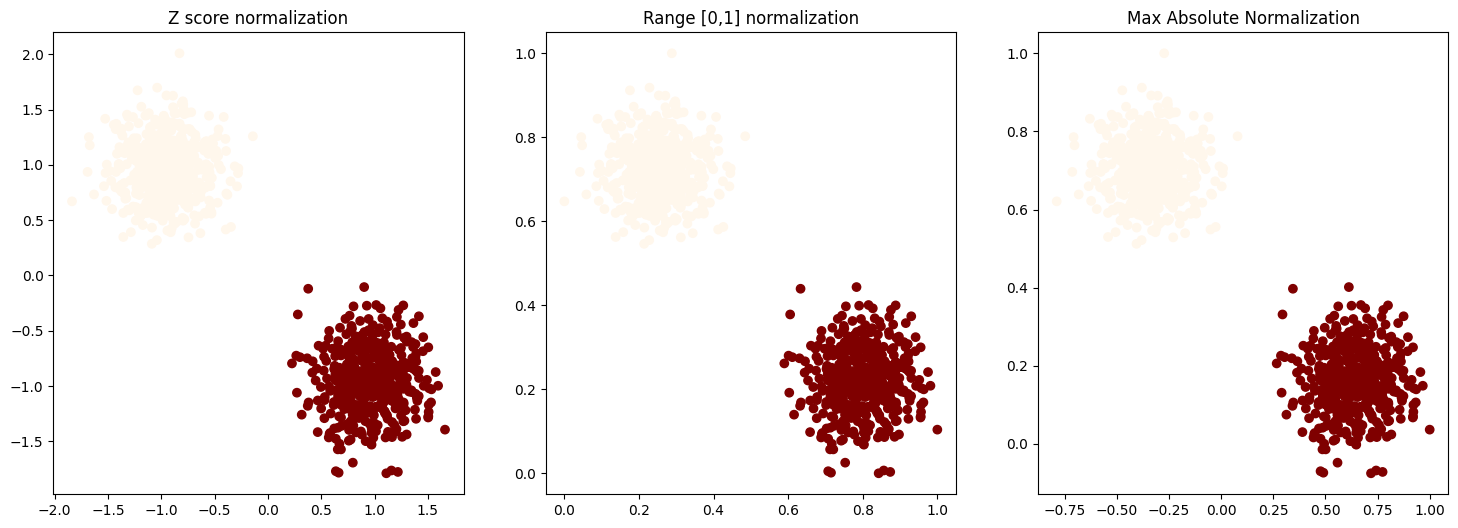

In [ ]:
#dataset preprocessing
from sklearn import preprocessing

zScoreScaler = preprocessing.StandardScaler() # z = (x - u) / s
minMaxScaler = preprocessing.MinMaxScaler() # range [0,1]
maxAbsScaler = preprocessing.MaxAbsScaler() # Dividendo ogni colonna per il suo massimo valore.

scalers = [zScoreScaler, minMaxScaler,maxAbsScaler]
titles = ["Z score normalization", "Range [0,1] normalization","Max Absolute Normalization"]

num_cols = len(scalers)
fig_width = 6  # Adjust this value as needed
fig_height = fig_width * num_cols
fig,axs = plt.subplots( 1,num_cols,figsize=(fig_height,fig_width ))

for i, (title,scaler) in enumerate(zip(titles,scalers)):
  #General api interface
  scaler.fit(X)
  X_scaled = scaler.transform(X)
  axs[i].scatter( X_scaled[:,0], X_scaled[:,1], c=y, cmap="OrRd")
  axs[i].set_title(title)


plt.show()


Un altro scaler importante è log normalization.

**Stratification**

In [207]:
def stampa_percentuale( y, title="" ):
  if title:print(title)
  # Calcoliamo le occorrenze di ciascuna classe nel dataset
  unique, counts = np.unique(y, return_counts=True)
  percentuali = (counts / len(y)) * 100 # calcolo la % di occorrenze per ciascuna classe
  # Stampiamo le occorrenze e le percentuali
  for classe, conteggio, percentuale in zip(unique, counts, percentuali):
      print(f"Classe {classe}: Occorrenze = {conteggio}, Percentuale {percentuale} %" )
  print(f"Totale occorrenze : {sum(y)}")
  print()

def genera_dataset(n_samples=1000, w=[0.5, 0.5], seed=42):
    # if sum(w) != 1.0:
    #     raise ValueError("La somma dei pesi in 'w' deve essere uguale a 1.0")

    n_classes = len(w)
    X = np.random.randint(0, 1500, n_samples)
    occorrenze = [int(n_samples * peso) for peso in w ]
    y = np.concatenate([np.full(occorrenza, classe) for classe, occorrenza in enumerate(occorrenze)])
    return X, y

from sklearn.model_selection import train_test_split

X,y = genera_dataset(w=[0.8,0.2] )

stampa_percentuale( y, "Dataset completo" )

# Esegui uno splitting stratificato
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) #stratify è importante

stampa_percentuale( y_train, "Training set splittato" )
stampa_percentuale( y_test, "Test set splittato" )



Dataset completo
Classe 0: Occorrenze = 800, Percentuale 80.0 %
Classe 1: Occorrenze = 200, Percentuale 20.0 %
Totale occorrenze : 200

Training set splittato
Classe 0: Occorrenze = 640, Percentuale 80.0 %
Classe 1: Occorrenze = 160, Percentuale 20.0 %
Totale occorrenze : 160

Test set splittato
Classe 0: Occorrenze = 160, Percentuale 80.0 %
Classe 1: Occorrenze = 40, Percentuale 20.0 %
Totale occorrenze : 40




Lo splitting stratificato è una pratica raccomandata quando si lavora con dataset di machine learning, specialmente quando ci sono classi sbilanciate. La sua importanza risiede nel fatto che assicura che i dati di test riflettano accuratamente la distribuzione dei dati reali, contribuendo così a mantenere la rappresentatività dei dati di addestramento anche nel test set. Questo migliora la generalizzazione del modello, previene il bias nell'apprendimento e consente di valutare in modo equo le prestazioni del modello.




**Balancing ed Unbalancing**

In [208]:
%%capture
%%bash
pip install imbalanced-learn

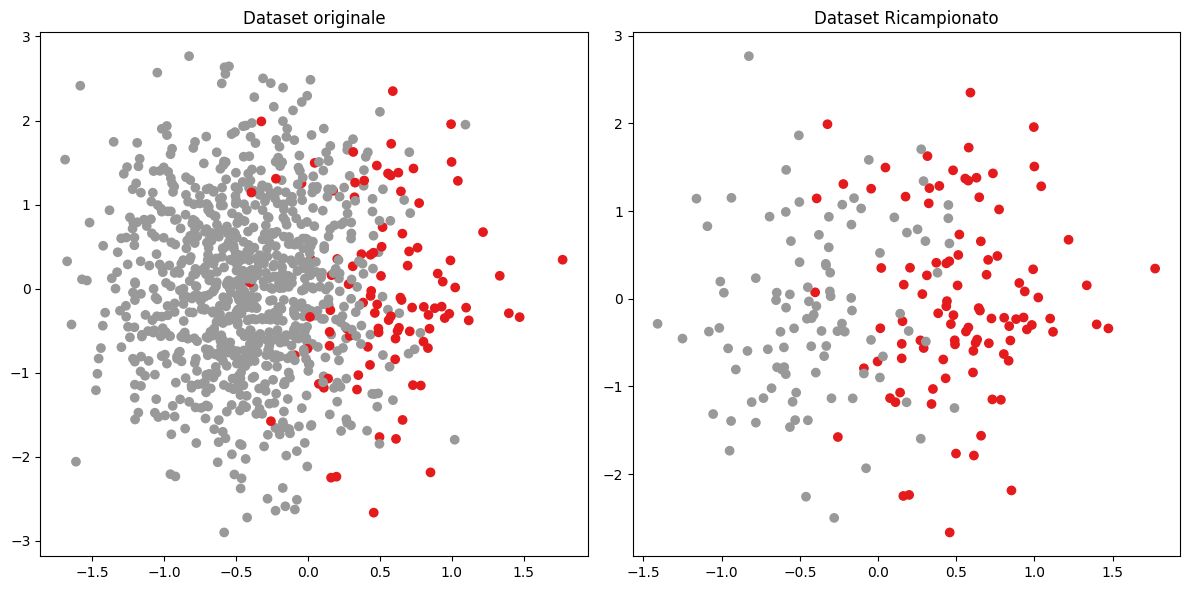

Dataset originale
Classe 0: Occorrenze = 100, Percentuale 10.0 %
Classe 1: Occorrenze = 900, Percentuale 90.0 %
Totale occorrenze : 900

Dataset ricampionato
Classe 0: Occorrenze = 100, Percentuale 50.0 %
Classe 1: Occorrenze = 100, Percentuale 50.0 %
Totale occorrenze : 100



In [215]:
import numpy as np
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler,NearMiss



# Genera un dataset sbilanciato di esempio
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=5, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Applica Il metodo per l'undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# undersampler = NearMiss(sampling_strategy='auto', version=2, n_neighbors=3)

X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Plotta il dataset originale e il dataset resampled
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', marker='o')
plt.title('Dataset originale')

plt.subplot(1, 2, 2)
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap='Set1', marker='o')
plt.title('Dataset Ricampionato')

plt.tight_layout()
plt.show()

stampa_percentuale( y, "Dataset originale" )
stampa_percentuale( y_resampled, "Dataset ricampionato" )


**Oversampling**

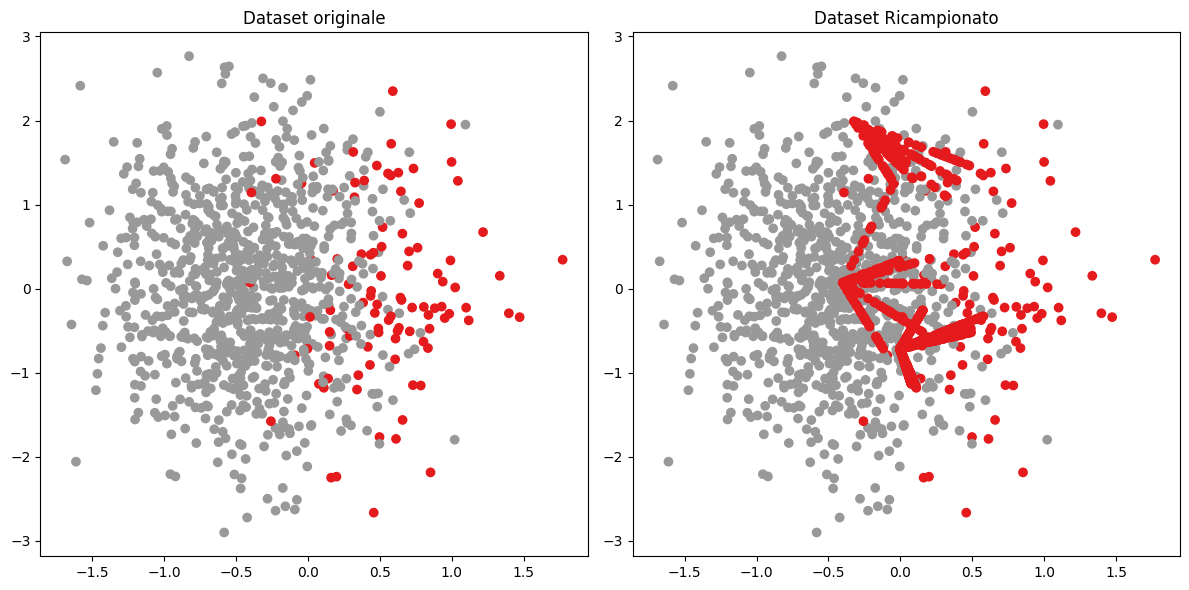

Dataset originale
Classe 0: Occorrenze = 100, Percentuale 10.0 %
Classe 1: Occorrenze = 900, Percentuale 90.0 %
Totale occorrenze : 900

Dataset ricampionato
Classe 0: Occorrenze = 900, Percentuale 50.0 %
Classe 1: Occorrenze = 900, Percentuale 50.0 %
Totale occorrenze : 900



In [224]:
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN,SMOTE

# Genera un dataset sbilanciato di esempio
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=5, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Applica SMOTE per l'oversampling
oversampler = SMOTE(sampling_strategy='auto', random_state=42)
oversampler = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=6)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Plotta il dataset originale e il dataset resampled
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', marker='o')
plt.title('Dataset originale')

plt.subplot(1, 2, 2)
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap='Set1', marker='o')
plt.title('Dataset Ricampionato')

plt.tight_layout()
plt.show()

stampa_percentuale( y, "Dataset originale" )
stampa_percentuale( y_resampled, "Dataset ricampionato" )

# Task di Classificazione

## Classificazione Binaria

Esempi di tasks di classificazione binaria

Training

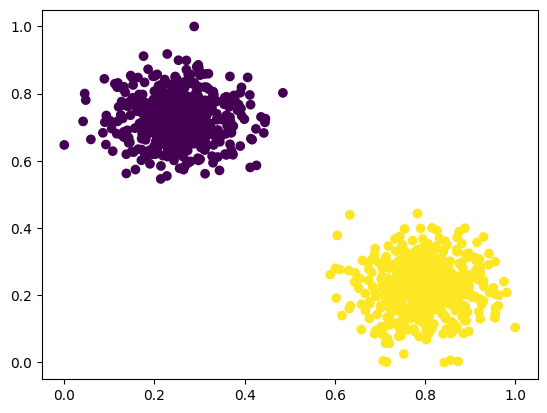

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#importiamo 3 modelli da sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
#dataset generation

from sklearn.datasets import make_blobs,make_moons,make_s_curve,make_circles
import matplotlib.pyplot as plt

n_samples = 1000
n_features = 2
n_classes = 2
seed = 42
noise_factor = 0.1
np.random.seed(seed)

# Genera il dataset con make_blobs
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_classes, random_state=seed,  )#cluster_std=[1.,2.]
# X, y = make_moons(n_samples=n_samples, noise=noise_factor, random_state=seed)
# X, y = make_circles(n_samples=n_samples, noise=noise_factor, factor=0.1, random_state=seed)


## Data preprocessing
# Creiamo un dataset di esempio con due classi in proporzione diversa
scaler = preprocessing.MinMaxScaler() # range [0,1]
scaler.fit(X)
X = scaler.transform(X)


#mostro la distribuzione del dataset a video
plt.scatter( X[:,0], X[:,1], c=y, cmap="viridis")
plt.show()

# Esegui uno splitting stratificato
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed) #stratify è importante

# Crea i modelli
# Creazione del modello di regressione logistica
model_logistic = LogisticRegression(
    penalty='l2',     # Tipo di regolarizzazione (l1 o l2)
    C=1.0,            # Inverso della forza di regolarizzazione
    random_state=42   # Seed per la riproducibilità
)


# Creazione del modello GaussianNB
model_naive_bayes = GaussianNB()


# Creazione del modello dell'albero decisionale con parametri personalizzati
model_decision_tree = DecisionTreeClassifier(
    criterion='entropy',  # Criterio per la suddivisione ('gini' o 'entropy')
    max_depth=None,       # Profondità massima dell'albero
    min_samples_split=2,  # Numero minimo di campioni richiesti per suddividere un nodo
    min_samples_leaf=1,   # Numero minimo di campioni richiesti in una foglia
    max_features=None,    # Numero di caratteristiche da considerare per la divisione
    random_state=seed     # Seed per la riproducibilità
)


# Addestramento dei modelli

model_logistic.fit(X,y)
model_naive_bayes.fit(X,y)
model_decision_tree.fit(X,y)

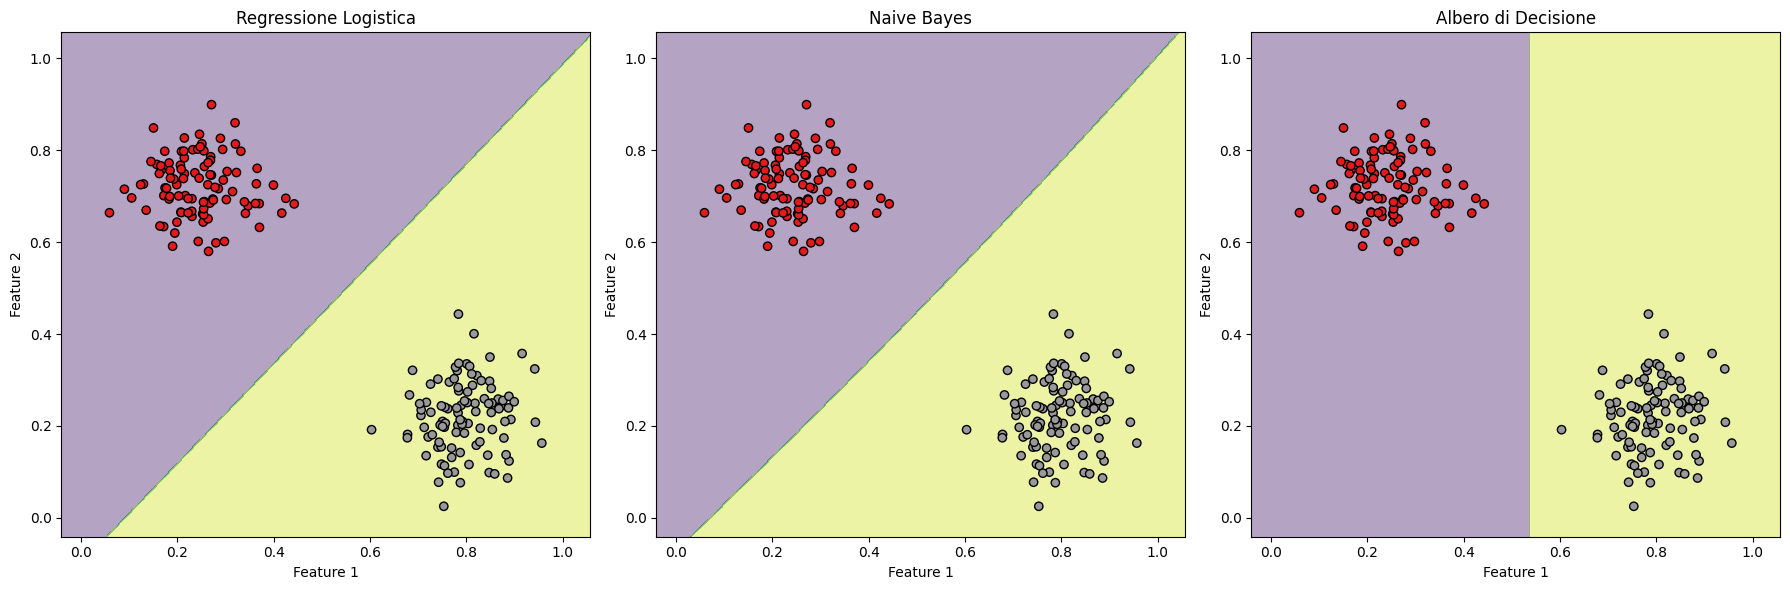

In [ ]:
#vediamo cosa hanno imparato

# Predici le classi per i dati di test
y_pred_logistic = model_logistic.predict(X_test)
y_pred_naive_bayes = model_naive_bayes.predict(X_test)
y_pred_decision_tree = model_decision_tree.predict(X_test)

# # Crea un meshgrid per visualizzare la decision boundary
x_min = X_test[:, 0].min() - 0.1
x_max = X_test[:, 0].max() + 0.1

xv = np.linspace(x_min,x_max, 500) # Questi valori rappresentano 500 punti lungo l'asse delle ascisse (X).
yv = np.linspace(x_min,x_max, 500) # Questi valori rappresentano 500 punti lungo l'asse delle ordinate (Y).

xx, yy = np.meshgrid(yv,xv) # creare un meshgrid bidimensionale.
# xx contiene i punti X della matrice XY lungo l'asse X
# yy conterrà i punti Y della matrice XY lungo l'asse Y


# Visualizza le decision boundary dei tre modelli
models = {
    'Regressione Logistica':model_logistic,
    'Naive Bayes': model_naive_bayes,
    'Albero di Decisione':model_decision_tree
}

plt.figure(figsize=(18, 6))

for i, (model_name, model) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)

    x_vec = xx.ravel() #array delle X della mesh
    y_vec = yy.ravel() #array delle Y della mesh

    zv = model.predict(np.c_[xx.ravel(), yy.ravel()])  # array delle Z (colore) della mesh
    zz = zv.reshape(xx.shape)
    plt.contourf(xx, yy, zz, alpha=0.4)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', edgecolor='k', cmap=plt.cm.Set1)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(model_name)

plt.tight_layout()
plt.show()

## Classificazione multi-classe

Esempio di tasks di classificazione multi-classe

In [11]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
seed=42
iris_dataset_pd = load_iris(as_frame=True) #as_frame torna un oggetto che contiene
X = iris_dataset_pd.data   #è un DataFrame pandas
y= iris_dataset_pd.target  #è un Series pandas
classes_dict = ['Setosa','Versicolor','Virginica']

print(f"Input features are: { X.columns.tolist() }, shape { X.shape }")
print(f"Outout features are: { y.unique().tolist()}")
print(f"Outout label are: { classes_dict }")

#Data preprocessing
scaler = preprocessing.MinMaxScaler() # range [0,1]
scaler.fit(X)
X = scaler.transform(X)

#Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed) #stratify è importante

#Training
# Crea i modelli
# Creazione del modello di regressione logistica
model_logistic = LogisticRegression(
    penalty='l2',     # Tipo di regolarizzazione (l1 o l2)
    C=1.0,            # Inverso della forza di regolarizzazione
    random_state=42   # Seed per la riproducibilità
)


# Creazione del modello GaussianNB
model_naive_bayes = GaussianNB()


# Creazione del modello dell'albero decisionale con parametri personalizzati
model_decision_tree = DecisionTreeClassifier(
    criterion='entropy',  # Criterio per la suddivisione ('gini' o 'entropy')
    max_depth=None,       # Profondità massima dell'albero
    min_samples_split=2,  # Numero minimo di campioni richiesti per suddividere un nodo
    min_samples_leaf=1,   # Numero minimo di campioni richiesti in una foglia
    max_features=None,    # Numero di caratteristiche da considerare per la divisione
    random_state=seed     # Seed per la riproducibilità
)


# Addestramento dei modelli

model_logistic.fit(X_train,y_train)
model_naive_bayes.fit(X_train,y_train)
model_decision_tree.fit(X_train,y_train)

#preprocessing che non abbiamo visto prima ( sul testo, data cleaning, sulle immagini di iris ad esempio )

#spiego la cross-validation come si usa e perchè è importante per valutare i modelli

#mostro le metriche ed i loro calcoli per concludere

Input features are: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], shape (150, 4)
Outout features are: [0, 1, 2]
Outout label are: ['Setosa', 'Versicolor', 'Virginica']


DecisionTreeClassifier(criterion='entropy', random_state=42)

Valutiamo i modelli
![image](https://drive.google.com/uc?id=1pLgFVYNR6zGdNNN6yBCqahniP0HdxuW7 )

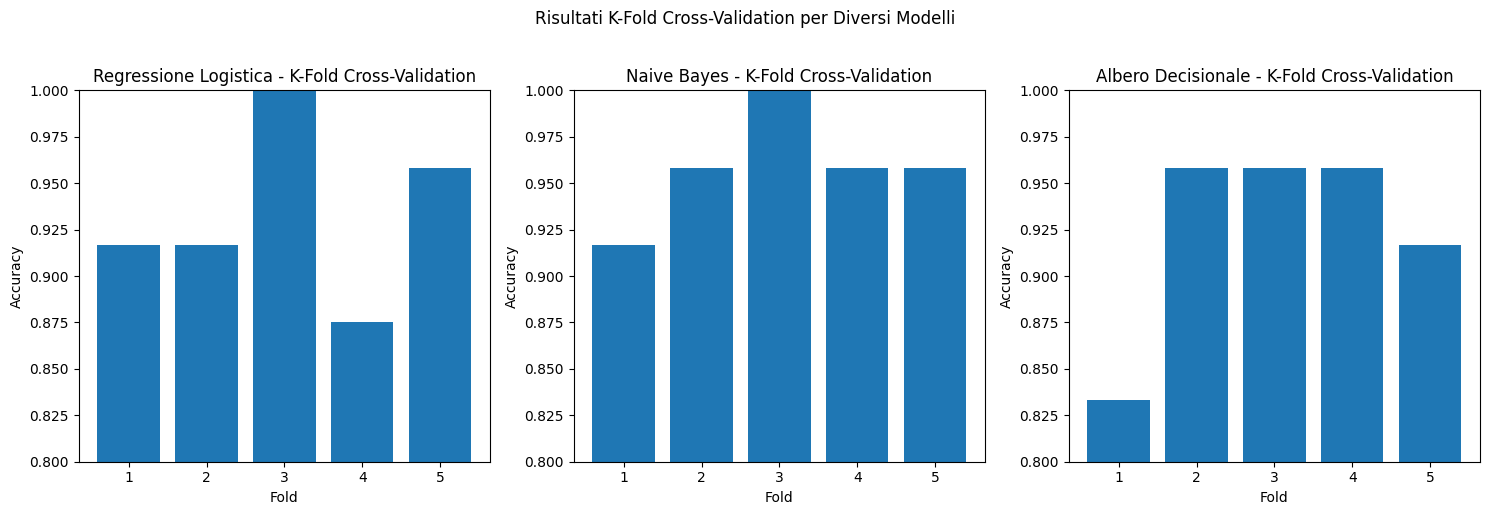

In [13]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt

# Definisci i modelli
modelli = [
    ("Regressione Logistica", model_logistic),
    ("Naive Bayes", model_naive_bayes),
    ("Albero Decisionale", model_decision_tree)
]

# Imposta il numero di fold
k = 5

# Crea oggetti StratifiedKFold per la cross-validation
cv = StratifiedKFold(n_splits=k)

# Crea una figura per i subplot
plt.figure(figsize=(15, 5))

# Itera attraverso i modelli
for i, (nome_modello, modello) in enumerate(modelli, 1):

    # Calcola i risultati della cross-validation per il modello corrente
    results = cross_val_score(modello, X_train, y_train, cv=cv)

    # Crea un subplot per il modello corrente
    plt.subplot(1, len(modelli), i)

    # Plotta i risultati
    plt.bar(range(1, k+1), results)
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title(f'{nome_modello} - K-Fold Cross-Validation')
    plt.ylim(0.8, 1.0)

# Aggiungi titolo alla figura
plt.suptitle('Risultati K-Fold Cross-Validation per Diversi Modelli', y=1.02)

# Mostra i subplots
plt.tight_layout()
plt.show()



se ci sono differenze significative fra le accurac dei vari fold vuol dire che il modello ha prestazioni variabili su diversi fold o che alcuni fold sono più difficili da predire rispetto ad altri.quindi potremmo provare a fare meglio. ad esempio con un emsamble.

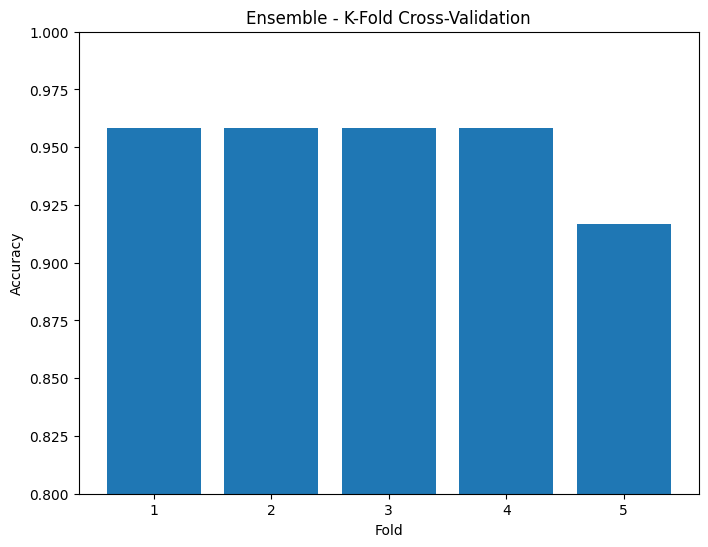

In [14]:
from sklearn.ensemble import VotingClassifier

# Crea l'ensemble dei modelli con il metodo di voto
ensemble_model = VotingClassifier(
    estimators=[
        ("Regressione Logistica", model_logistic),
        ("Naive Bayes", model_naive_bayes),
        ("Albero Decisionale", model_decision_tree)
    ],
    voting='soft'  # 'soft' per il voto basato sulle probabilità
)
ensemble_model.fit(X_train,y_train)

# Esegui la cross-validation sul modello ensemble
results_ensemble = cross_val_score(ensemble_model, X_train, y_train, cv=cv)

# Plotta i risultati del modello ensemble
plt.figure(figsize=(8, 6))
plt.bar(range(1, k+1), results_ensemble)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Ensemble - K-Fold Cross-Validation')
plt.ylim(0.8, 1.0)  # Imposta il limite dell'asse y per una migliore visualizzazione
plt.show()

| Modello               |   Accuratezza |   Precisione |   Recall |   F1-Score |
|:----------------------|--------------:|-------------:|---------:|-----------:|
| Regressione Logistica |      0.9      |     0.902357 | 0.9      |   0.899749 |
| Naive Bayes           |      0.966667 |     0.969697 | 0.966667 |   0.966583 |
| Albero Decisionale    |      0.933333 |     0.933333 | 0.933333 |   0.933333 |
| Ensemble              |      0.933333 |     0.933333 | 0.933333 |   0.933333 |


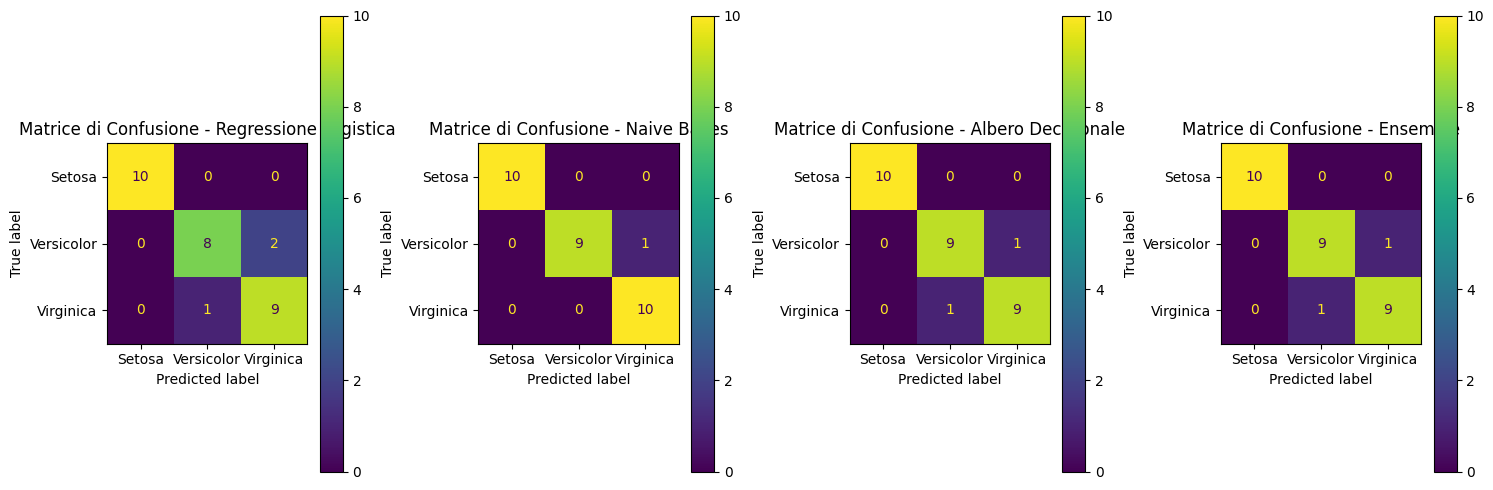

In [20]:
#valutiamo chi ha fatto meglio con la marice di confusione e tutte le sue metriche
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


def confronta_modelli(X_test, y_test, modelli):

    fig, axes = plt.subplots(1, len(modelli), figsize=(15, 5))  # Crea una riga di grafici
    results = []
    for i, (nome_modello, modello) in enumerate(modelli):
      y_pred = modello.predict(X_test)

      accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred, average="macro")
      recall = recall_score(y_test, y_pred, average="macro")
      f1 = f1_score(y_test, y_pred, average="macro")
      conf_matrix = confusion_matrix(y_test, y_pred)
      # Plotta la matrice di confusione
      ConfusionMatrixDisplay(conf_matrix, display_labels=['Setosa','Versicolor','Virginica']).plot(ax=axes[i] )
      axes[i].set_title(f"Matrice di Confusione - {nome_modello}")

      risultato_modello = {
            "Modello": nome_modello,
            "Accuratezza": accuracy,
            "Precisione": precision,
            "Recall": recall,
            "F1-Score": f1
      }

      results.append(risultato_modello)

    results_df = pd.DataFrame(columns=["Modello", "Accuratezza", "Precisione", "Recall", "F1-Score"], data=results)

    print(results_df.to_markdown(index=False))
    # Mostra i subplot
    plt.tight_layout()
    plt.show()


modelli = [
    ("Regressione Logistica", model_logistic),
    ("Naive Bayes", model_naive_bayes),
    ("Albero Decisionale", model_decision_tree),
    ("Ensemble", ensemble_model)
]

# Ottieni i risultati delle metriche per tutti i modelli
confronta_modelli(X_test, y_test, modelli)

**Accuracy** (Accuratezza): L'accuracy è una misura della percentuale di previsioni corrette fatte dal modello rispetto al numero totale di previsioni.

$$
Accuracy = \frac{Numero\ di\ previsioni\ corrette}{Numero\ totale\ di\ previsioni}
$$

**Precision** (Precisione):Si concentra sulla percentuale di previsioni positive fatte dal modello che erano effettivamente corrette.

$$
Precision = \frac{True\ Positives}{True\ Positives + False\ Positives}
$$


**Recall** (Recall o True Positive Rate): Il recall è una misura della frazione di esempi positivi reali che sono stati correttamente previsti dal modello.

$$
Recall = \frac{True\ Positives}{True\ Positives + False\ Negatives}
$$


**F1-Score** (F1-Score o F1 Measure): Il F1-Score è una metrica che combina precisione e recall in un'unica misura. È il valore medio armonico tra precisione e recall.

$$
F1-Score = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$





#Esercizio per casa

Esaminare i nodi decisionali principali del decision tree per
una comprensione più dettagliata del processo decisionale. Se possibile estrarre le regole decisionali dall'albero per capire come i dati sono stati separati in base alle condizioni delle feature.

Suggerimenti:
*    Visualizzazione dell'albero: Puoi utilizzare la funzione plot_tree di scikit-learn per visualizzare il tuo decision tree. Questo ti darà un'idea della struttura dell'albero e dei nodi decisionali.

*    Esaminare i nodi decisionali principali dell'albero per capire come vengono prese le decisioni. Questo può darti

*    Capire l'importanza delle feature utilizzate nell'addestramento dell'albero decisionale. Questo ti dirà quali feature sono state ritenute più importanti nell'effettuare le decisioni.





[Text(0.5, 0.9166666666666666, 'petal length <= 0.246\nentropy = 1.585\nsamples = 100.0%\nvalue = [0.333, 0.333, 0.333]\nclass = setosa'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 33.3%\nvalue = [1.0, 0.0, 0.0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'petal width <= 0.688\nentropy = 1.0\nsamples = 66.7%\nvalue = [0.0, 0.5, 0.5]\nclass = versicolor'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length <= 0.669\nentropy = 0.445\nsamples = 36.0%\nvalue = [0.0, 0.907, 0.093]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width <= 0.646\nentropy = 0.146\nsamples = 32.0%\nvalue = [0.0, 0.979, 0.021]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 31.3%\nvalue = [0.0, 1.0, 0.0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 0.7%\nvalue = [0.0, 0.0, 1.0]\nclass = virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width <= 0.604\nentropy = 0.918

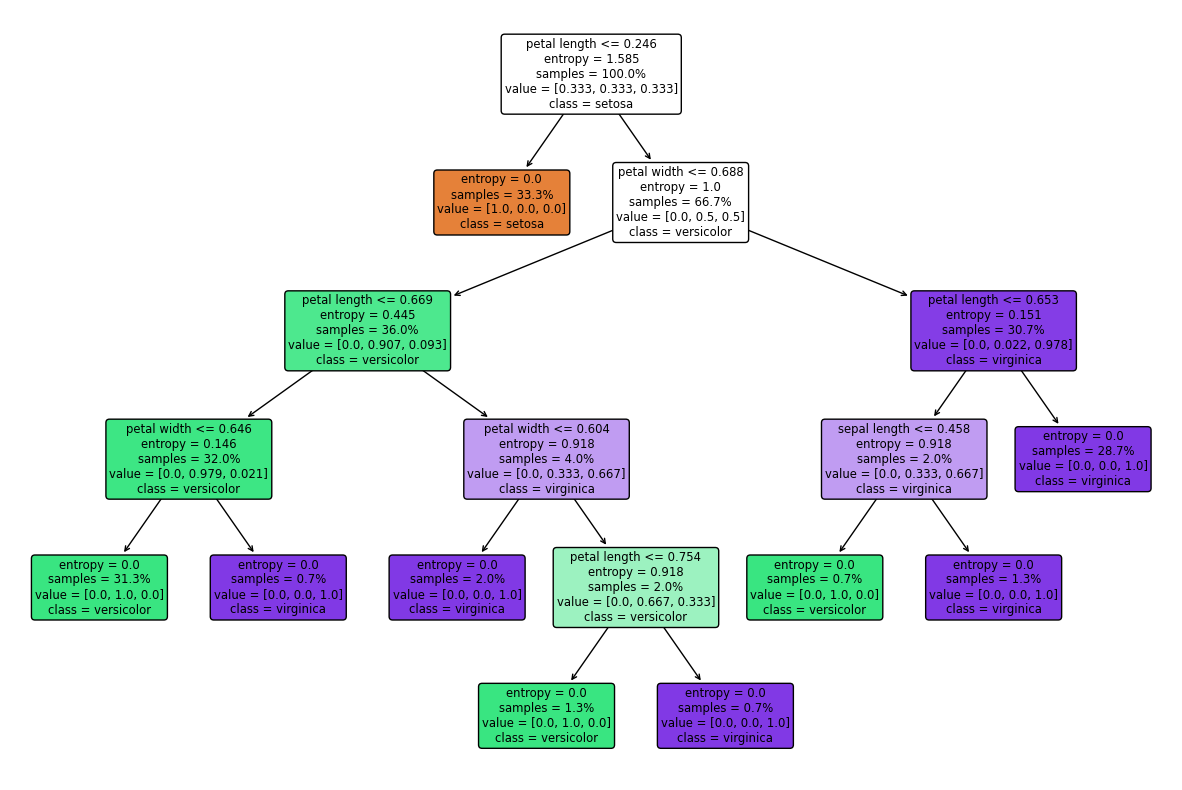

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(model_decision_tree, proportion = True, rounded=True, filled=True, feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'], class_names=['setosa', 'versicolor', 'virginica'])

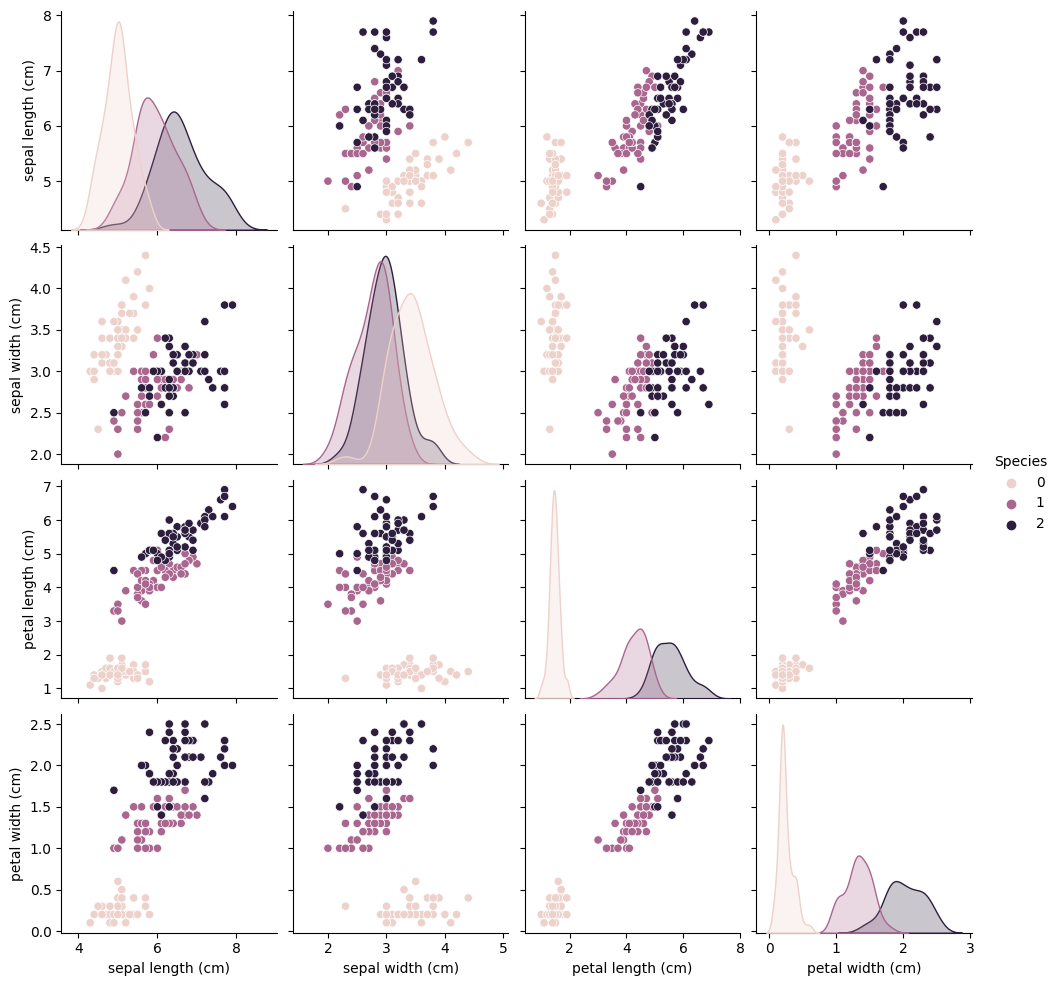

In [ ]:
import seaborn as sns
df = iris_dataset_pd.data
df["Species"] = iris_dataset_pd.target

sns.pairplot( df, hue="Species")